Epoch 1/30
2/2 [==============================] - 3s 960ms/step - loss: 17.8257 - accuracy: 0.1019 - val_loss: 13.3481 - val_accuracy: 0.2963
Epoch 2/30
2/2 [==============================] - 2s 1s/step - loss: 13.1150 - accuracy: 0.1759 - val_loss: 3.2765 - val_accuracy: 0.2222
Epoch 3/30
2/2 [==============================] - 2s 783ms/step - loss: 3.7124 - accuracy: 0.2963 - val_loss: 1.8675 - val_accuracy: 0.2222
Epoch 4/30
2/2 [==============================] - 2s 793ms/step - loss: 1.8215 - accuracy: 0.3333 - val_loss: 1.7038 - val_accuracy: 0.2593
Epoch 5/30
2/2 [==============================] - 2s 801ms/step - loss: 1.6407 - accuracy: 0.3241 - val_loss: 1.6633 - val_accuracy: 0.3333
Epoch 6/30
2/2 [==============================] - 3s 1s/step - loss: 1.4994 - accuracy: 0.4537 - val_loss: 1.6623 - val_accuracy: 0.1852
Epoch 7/30
2/2 [==============================] - 2s 784ms/step - loss: 1.3320 - accuracy: 0.5278 - val_loss: 1.5513 - val_accuracy: 0.4444
Epoch 8/30
2/2 [=======

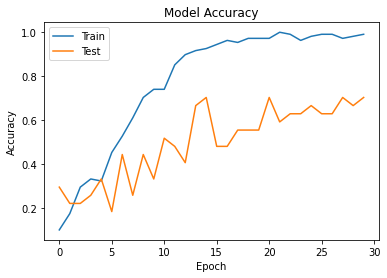

In [50]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# Define the audio folder paths and labels
audio_folders = ['/audio/breathing', '/audio/drinking', '/audio/laughing', '/audio/sneezing', '/audio/snoring', '/audio/coughing']
labels = ['breathing', 'drinking', 'laughing', 'sneezing', 'snoring', 'coughing']

# Load audio data and labels
data = []
label = []
for i, folder in enumerate(audio_folders):
    for filename in os.listdir(folder):
        filepath = os.path.join(folder, filename)
        try:
            audio, sr = librosa.load(filepath, res_type='kaiser_fast')
            mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
            data.append(mfccs)
            label.append(i)
        except:
            pass

# Convert data and labels to numpy arrays
data = np.array(data)
label = np.array(label)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=42)

# Reshape the data to fit the CNN input shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# Convert the labels to categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(256, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(labels), activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=64)

# Evaluate the model
score, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', acc)

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
